In [2]:
import numpy as np
import networkx as nx
import pygad
from core_periphery import Stochastic_Block_Model

# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)
n = A.shape[0]

# Initialize the SBM class with the adjacency matrix
sbm = Stochastic_Block_Model(G, A)

# Parameters for Borgatti and Everett correlation optimization
ga_instance_borgatti = pygad.GA(
    num_generations=1000,
    num_parents_mating=5,
    fitness_func=sbm.fitness_function_borgatti_everett,
    sol_per_pop=20,
    num_genes=n,
    gene_type=float,
    gene_space=[0, 1],  # Genes will be floats between 0 and 1
    mutation_type="random",
    mutation_percent_genes=10,
)

# Run the genetic algorithm for Borgatti and Everett correlation
ga_instance_borgatti.run()

# Get the best solution for Borgatti and Everett correlation
solution_borgatti, solution_fitness_borgatti, solution_idx_borgatti = ga_instance_borgatti.best_solution()
best_core_indices_borgatti = [i for i, gene in enumerate(solution_borgatti) if gene > 0.5]
ρ = sbm.borgatti_everett_correlation(best_core_indices_borgatti)

print("-----------------------------")
print("*** Borgatti Everett")
print(f"Best core indices (Borgatti and Everett): {best_core_indices_borgatti}")
print(f"Maximum Borgatti and Everett correlation ρ: {ρ}")

# Parameters for Brusco metric optimization
ga_instance_brusco = pygad.GA(
    num_generations=1000,
    num_parents_mating=5,
    fitness_func=sbm.fitness_function_brusco_metric,
    sol_per_pop=20,
    num_genes=n,
    gene_type=float,
    gene_space=[0, 1],  # Genes will be floats between 0 and 1
    mutation_type="random",
    mutation_percent_genes=10,
)

# Run the genetic algorithm for Brusco metric
ga_instance_brusco.run()

# Get the best solution for Brusco metric
solution_brusco, solution_fitness_brusco, solution_idx_brusco = ga_instance_brusco.best_solution()
best_core_indices_brusco = [i for i, gene in enumerate(solution_brusco) if gene > 0.5]
Z = sbm.brusco_metric(best_core_indices_brusco)
print("-----------------------------")
print("*** Brusco")
print(f"Best core indices (Brusco): {best_core_indices_brusco}")
print(f"Maximum Brusco metric Z: {Z}")

/Users/jeongjin/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


-----------------------------
*** Borgatti Everett
Best core indices (Borgatti and Everett): [0, 1, 2, 32, 33]
Maximum Borgatti and Everett correlation ρ: 0.4292788075912876
-----------------------------
*** Brusco
Best core indices (Brusco): [33]
Maximum Brusco metric Z: 467


In [3]:
from core_periphery import Transport
from core_periphery import Rossa
from core_periphery import Minre
from core_periphery import Lip
from core_periphery import Rombach

# Example usage
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)
n = A.shape[0]
tp = Transport(G, A)
metric, best_cores = tp.holme_metric(G, 1000)

print("-----------------------------")
print("*** Holme")
print(f"Best core indices (Holme): {best_cores}")
print(f"Holme Metric: {metric}")
print("-----------------------------")
metric, best_cores, _ = tp.silva_core_coefficient(G)

print("*** Silva")
print(f"Best core indices (Silva): {best_cores}")
print(f"Silva Metric (Core Coefficient): {metric}")

print("-----------------------------")

print("*** Rossa")
rossa = Rossa(G)
alpha = rossa.get_alpha()
cp_centralization = rossa.get_cp_centralization()
z_score = rossa.calculate_z_score(num_randomizations=100)
core_nodes = rossa.extract_core_nodes(0.7)
#print("Alpha values:", alpha)
print("CP-Centralization:", cp_centralization)
print("Z-Score:", z_score)
print("Core nodes (threshold={}):".format(0.7), core_nodes)

print("-----------------------------")

print("*** Minre")
model = Minre(G, A)
w, best_cores, pre = model.minres()

print("Core Nodes:", best_cores)
print("Proportional Reduction of Error (PRE):", pre)

print("-----------------------------")

print("*** Lip")
model = Lip(G, A)
z_influence, cores, z = model.calculate()

print("Core Nodes:", cores)
print("Z index:", z)


print("-----------------------------")

print("*** Rombach")
model = Rombach(G, A)
best_order, core_scores_optimized, result, R_gamma = model.optimize()

print("Core Nodes:", result)
print("R_Gamma index:", R_gamma)

-----------------------------
*** Holme
Best core indices (Holme): [0, 1, 2, 3, 32, 33, 7, 8, 13, 30]
Holme Metric: 11.438166392252107
-----------------------------
*** Silva
Best core indices (Silva): [0, 2, 33, 31, 8, 13]
Silva Metric (Core Coefficient): 0.8235294117647058
-----------------------------
*** Rossa
CP-Centralization: 0.640898039713278
Z-Score: 1.9827202110287405
Core nodes (threshold=0.7): [0, 32, 33]
-----------------------------
*** Minre
Core Nodes: [ 0 33]
Proportional Reduction of Error (PRE): 0.20325790084568873
-----------------------------
*** Lip
Core Nodes: [33  0 32  2  1  3]
Z index: 23.0
-----------------------------
*** Rombach
Core Nodes: [33, 7, 13, 3, 1, 2, 0]
R_Gamma index: 36.699691825259514


*** KM_ER
Core Nodes: {0: [0, 1, 2, 7, 12, 13], 1: [5, 6, 10], 2: [29, 32, 33], 3: [24]}
Q_cp index: 43.79144385026729
Q_c index: [16.74331551  4.7486631  20.57754011  1.72192513]
Significant cores: [0, 1, 2, 3]
Total Q_cp_BE: 0.002630890347220656
-----------------------------


/Users/jeongjin/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


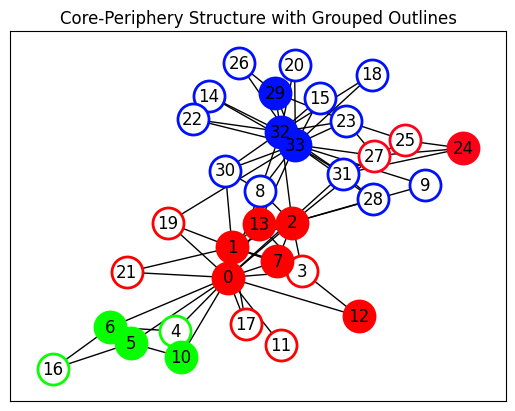

In [8]:
from core_periphery import KM_ER
import numpy as np
import networkx as nx
import pygad
from core_periphery import Stochastic_Block_Model

# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)

n = A.shape[0]


print("*** KM_ER")
model = KM_ER(G, A)
c, x, Qcp, Qc = model.optimize( max_updates=10000)

multi_cores = dict()
for i in range(len(x)):
    if c[i] not in multi_cores:
        multi_cores[c[i]] = []  # Correctly initialize a list for the new key
    if x[i] == 1:
        multi_cores[c[i]].append(i)  # Append the node index i to the list for core c[i]

print("Core Nodes:", multi_cores)
print("Q_cp index:", Qcp)
print("Q_c index:", Qc)
significant_cores, total_Q_cp_BE = model.calculate_multi_core_Q_cp_BE(c, x)

print("Significant cores:", significant_cores)
print("Total Q_cp_BE:", total_Q_cp_BE)

print("-----------------------------")

model.visualize_core_periphery(c, x)

*** KM_Config
Core Nodes: {0: [0, 1, 2, 3], 1: [10], 2: [6, 16], 3: [8, 23, 26, 32, 33], 4: [25, 31]}
Q_cp index: 1.9482248520710035
-----------------------------


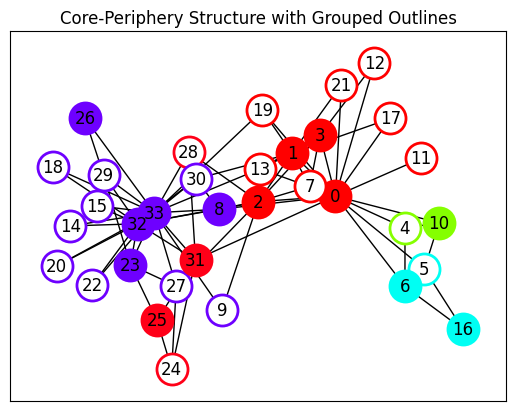

In [10]:
from core_periphery import KM_Config


# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)

n = A.shape[0]


print("*** KM_Config")
model = KM_Config(G, A)
c, x, Qcp = model.optimize( max_updates=1000)

multi_cores = dict()
for i in range(len(x)):
    if c[i] not in multi_cores:
        multi_cores[c[i]] = []  # Correctly initialize a list for the new key
    if x[i] == 1:
        multi_cores[c[i]].append(i)  # Append the node index i to the list for core c[i]

print("Core Nodes:", multi_cores)
print("Q_cp index:", Qcp)
# significant_cores, total_Q_cp_BE = model.calculate_multi_core_Q_cp_BE(c, x)

# print("Significant cores:", significant_cores)
# print("Total Q_cp_BE:", total_Q_cp_BE)

print("-----------------------------")

model.visualize_core_periphery(c, x)

In [16]:

from core_periphery import Lap_Core
import numpy as np
import networkx as nx

G = nx.karate_club_graph()
model = Lap_Core(G)

scores, core_set, _ = model.low_rank_core()
print(model.low_rank_core())
print(model.lap_core())
print(model.lap_sgn_core())

#model.visualize_core_periphery(set(best_core_indices_borgatti))

(array([19, 18, 23, 14,  6,  6,  6, 13, 17,  1,  4,  3,  3, 16,  6, 11,  0,
        3,  3,  6,  4,  6,  6, 18,  3, 13,  4, 12,  4, 13, 15, 16, 20, 22]), {32, 33, 2, 0, 1}, 0.7256157635467981)
(array([-0.04841527, -0.00992544,  0.00902858,  0.00233714,  0.53373948,
        0.45824134, -0.37448109,  0.01161996, -0.00171615, -0.0162508 ,
       -0.58202158,  0.0782984 ,  0.01673984,  0.01228142, -0.02444396,
       -0.02233871, -0.0677296 ,  0.05754949, -0.02116912,  0.03432492,
       -0.02628606,  0.04717504, -0.02198783, -0.02521864, -0.01403464,
        0.02990917, -0.00705113,  0.01028643, -0.00249165,  0.00126074,
       -0.00898781, -0.01496505,  0.01815222,  0.01055856]), {32, 33, 2, 3, 4, 5, 7, 8, 11, 12, 13, 17, 19, 21, 25, 27, 29}, 0.14956747404844292)
(array([-1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
       -1.,  1., -1.,  1., -1., -1.,  1.,  1.]), {0, 1, 6, 8, 9, 10, 14, 15, 16, 18,

In [42]:
import networkx as nx
import math



def calculate_parameters(G, group_1, group_2):
    V = math.comb(G.number_of_nodes(), 2)
    V_bullet = math.comb(len(group_1), 2)
    V_circle = math.comb(len(group_2), 2)
    
    L = G.number_of_edges()
    l_bullet = len([edge for edge in G.edges if edge[0] in group_1 and edge[1] in group_1])
    l_circle = len([edge for edge in G.edges if edge[0] in group_2 and edge[1] in group_2])
    
    return V, V_bullet, V_circle, L, l_bullet, l_circle

def MH(l_bullet, l_circle, V, V_bullet, V_circle, L):
    V_top = V - (V_bullet + V_circle)
    l_top = L - (l_bullet + l_circle)
    
    numerator = (
        math.comb(V_bullet, l_bullet) *
        math.comb(V_circle, l_circle) *
        math.comb(V_top, l_top)
    )
    
    denominator = math.comb(V, L)
    
    MH_value = numerator / denominator
    
    return MH_value

# Load the Karate Club dataset
G = nx.karate_club_graph()

# Split the nodes into two groups based on the known club division
group_1 = {32, 33, 2, 0, 1}  # One group of nodes (core)
group_2 = set(G.nodes()) - group_1           # The other group (periphery)

# Calculate the parameters
V, V_bullet, V_circle, L, l_bullet, l_circle = calculate_parameters(G, group_1, group_2)

# Calculate the MH function value
result = MH(l_bullet, l_circle, V, V_bullet, V_circle, L)
print("The value of the MH function for the Karate Club network is:", result)

The value of the MH function for the Karate Club network is: 5.295156318391612e-14


In [31]:
result

4.460300383230227e-15